In [1]:
#Import initial dependencies

import pandas as pd
import pyodbc 

#Establish connection to SQL database

conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                      'Server=tcp:group1-owner-nu.database.windows.net,1433;'
                      'Database=final-project;'
                      'Persist Security Info=False;'
                      'Uid=GROUPDB1NU;'
                      'Pwd=NU02282021!;'
                      'MultipleActiveResultSets=False;'
                      'Encrypt=Yes;'
                      'TrustServerCertificate=No;'
                      'Connection Timeout=30;')


cursor = conn.cursor()

#Read tables from SQL

initial_df = pd.read_sql("SELECT * FROM dbo.final_table", conn)

initial_df.head()


InterfaceError: ('28000', "[28000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Login failed for user 'GROUPDB1NU'. (18456) (SQLDriverConnect); [28000] [Microsoft][ODBC Driver 17 for SQL Server]Invalid connection string attribute (0); [28000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Login failed for user 'GROUPDB1NU'. (18456); [28000] [Microsoft][ODBC Driver 17 for SQL Server]Invalid connection string attribute (0)")

In [3]:
X = initial_df[["Winery", "WineName", "Year","Region", "RegionalVariety", "VintageRatingCount","VintagePrice", "VintageRatingPriceRatio", "WineRating", "WineRatingCount", "WineRatingPriceRatio"]]
y = initial_df["VintageRating"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4593, 11) (4593, 1)


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Drop features
clean_df = initial_df.drop(['WineName', 'Region', 'RegionalVariety', 'VintageRatingCount', 'WineRatingCount', 'Age', 'WinePrice'], axis=1)
clean_df.head()

,FullName,Winery,Year,VintageRating,VintagePrice,VintageRatingPriceRatio,WineRating,WineRatingPriceRatio
0,A. Christmann Idig GG 2012,A. Christmann,2012,4.3,83.95,0.051221,4.3,0.051221
1,A. Christmann Idig GG 2014,A. Christmann,2014,4.1,77.95,0.052598,4.3,0.055164
2,A. Christmann Idig GG 2015,A. Christmann,2015,4.3,57.55,0.074718,4.3,0.074718
3,Abadal Nuat 2015,Abadal,2015,4.1,31.99,0.128165,3.9,0.121913
4,Abadia Retuerta Le Domaine Blanco de Guarda 2015,Abadia Retuerta,2015,4.1,29.00,0.141379,4.2,0.144828


In [6]:
clean_df['Year'] = clean_df['Year'].replace(['N.V.'],'2020').dropna().astype(float)

In [7]:
clean_df.dtypes

FullName                    object
Winery                      object
Year                       float64
VintageRating              float64
VintagePrice               float64
VintageRatingPriceRatio    float64
WineRating                 float64
WineRatingPriceRatio       float64
dtype: object

In [9]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4593 entries, 0 to 4592
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FullName                 4593 non-null   object 
 1   Winery                   4593 non-null   object 
 2   Year                     4593 non-null   float64
 3   VintageRating            4593 non-null   float64
 4   VintagePrice             4593 non-null   float64
 5   VintageRatingPriceRatio  4593 non-null   float64
 6   WineRating               4593 non-null   float64
 7   WineRatingPriceRatio     4593 non-null   float64
dtypes: float64(6), object(2)
memory usage: 287.2+ KB


In [10]:
clean_df.describe()

,Year,VintageRating,VintagePrice,VintageRatingPriceRatio,WineRating,WineRatingPriceRatio
count,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000
mean,2013.627694,4.208295,103.891106,0.101720,4.159634,0.100227
std,3.907002,0.171775,437.899654,0.054876,0.175613,0.053594
min,1983.000000,3.900000,10.500000,0.000512,3.500000,0.000512
25%,2012.000000,4.100000,28.480000,0.057525,4.000000,0.057333
50%,2015.000000,4.200000,41.670000,0.100024,4.100000,0.098843
75%,2016.000000,4.300000,74.680000,0.144828,4.300000,0.142809
max,2020.000000,4.900000,9180.000000,0.380952,4.700000,0.361905


In [10]:
# "FullName", "Winery",
X = clean_df[[ "Year", "VintagePrice", "VintageRatingPriceRatio", "WineRating", "WineRatingPriceRatio"]]
y = clean_df["VintageRating"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4593, 5) (4593, 1)


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

ct = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.float64)),
    (OrdinalEncoder(), make_column_selector(dtype_include=object))
)
ct.fit_transform(X)

array([[-0.41665485, -0.04554303, -0.92034151,  0.79937949, -0.91449465],
       [ 0.09530227, -0.05924629, -0.89524864,  0.79937949, -0.84092295],
       [ 0.35128084, -0.10583738, -0.49211979,  0.79937949, -0.47603031],
       ...,
       [ 1.11921652, -0.0869954 , -0.69054848,  0.22988205, -0.67920521],
       [ 0.09530227, -0.16720515,  0.52227993, -0.90911283,  0.5626328 ],
       [ 1.11921652, -0.18412868,  1.43555664, -0.90911283,  1.33736996]])

In [16]:
X_encoded = ct.fit_transform(X)
y_encoded = y
lr = LinearRegression()
lr.fit(X_encoded, y_encoded)
lr.score(X_encoded, y_encoded)

0.877734987463609

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = make_pipeline(ct, LinearRegression())
model.fit(X, y)
model.score(X_test, y_test)

0.8640005437048607

In [29]:
# visualize pipeline
from sklearn import set_config
set_config(display="diagram")
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000242051B7748>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000242051B7B88>)])),
                ('linearregression', LinearRegression())])

In [18]:
# steps that transform input data into a format understod by the model
model.steps

[('columntransformer',
  ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                   <sklearn.compose._column_transformer.make_column_selector object at 0x00000128F970BAC8>),
                                  ('ordinalencoder', OrdinalEncoder(),
                                   <sklearn.compose._column_transformer.make_column_selector object at 0x00000128F9091848>)])),
 ('linearregression', LinearRegression())]

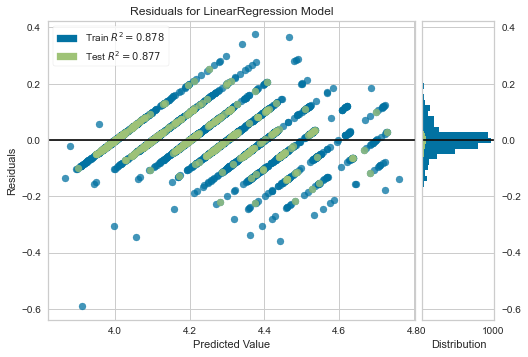

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [20]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1
)

visualizer = ResidualsPlot(model)
visualizer.fit(X, y)
visualizer.score(X_test, y_test)
visualizer.show()

In [21]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

In [22]:
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.003395387554488735, R2: 0.877407772833871


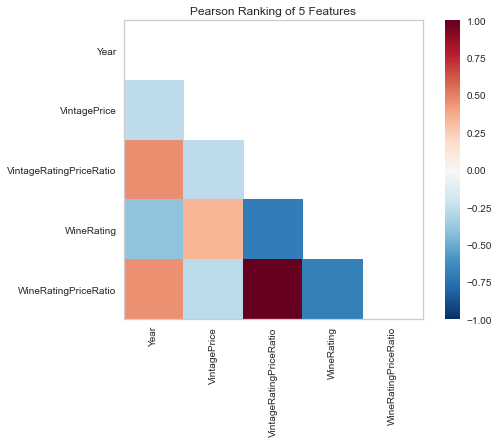

<AxesSubplot:title={'center':'Pearson Ranking of 5 Features'}>

In [24]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.show()

In [30]:
clean_df.to_csv('clean_df.csv', index=False)